In [321]:
import mlrose
import numpy as np
import matplotlib.pyplot as plt
import time
import math
from random import randint

# Create list of city coordinates
#coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3),(5,6),(4,8),(8,8),(9,7)]
NUM_OF_COORDS=20
coords = [(randint(1,NUM_OF_COORDS),randint(1,NUM_OF_COORDS)) for i in range(1,NUM_OF_COORDS)]
coords_list= list(set(coords))


# Initialize fitness function object using coords_list
fitness_coords = mlrose.TravellingSales(coords = coords_list)

# Create list of distances between pairs of cities
dist_list = [(0, 1, 3.1623), (0, 2, 4.1231), (0, 3, 5.8310), (0, 4, 4.2426), \
             (0, 5, 5.3852), (0, 6, 4.0000), (0, 7, 2.2361), (1, 2, 1.0000), \
             (1, 3, 2.8284), (1, 4, 2.0000), (1, 5, 4.1231), (1, 6, 4.2426), \
             (1, 7, 2.2361), (2, 3, 2.2361), (2, 4, 2.2361), (2, 5, 4.4721), \
             (2, 6, 5.0000), (2, 7, 3.1623), (3, 4, 2.0000), (3, 5, 3.6056), \
             (3, 6, 5.0990), (3, 7, 4.1231), (4, 5, 2.2361), (4, 6, 3.1623), \
             (4, 7, 2.2361), (5, 6, 2.2361), (5, 7, 3.1623), (6, 7, 2.2361)]

# Initialize fitness function object using dist_list
fitness_dists = mlrose.TravellingSales(distances = dist_list)

# Define optimization problem object
problem_fit = mlrose.TSPOpt(length = len(coords_list), fitness_fn = fitness_coords, maximize=True)
# Create list of city coordinates
#coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)]

# Define optimization problem object
#problem_no_fit = mlrose.TSPOpt(length = 8, coords = coords_list, maximize=False)

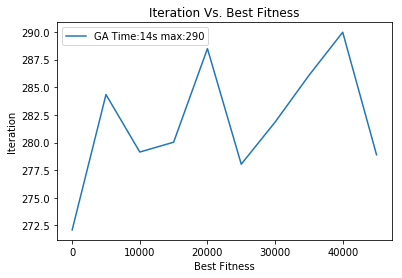

In [322]:
# Set random seed

np.random.seed(2)
NUM_TIMES_TO_RUN=1
MAX_ITERATION=50000
sum_best_fitness_list=np.array([0,0])
t0 = time.clock()
for i in range(NUM_TIMES_TO_RUN):
    best_fitness_list = []
    for i in range(1, MAX_ITERATION, 5000):
    # Solve problem using the genetic algorithm
        best_state, best_fitness = mlrose.genetic_alg(problem_fit, max_iters=i)
        #print(i)
        #print(best_state)
        best_fitness_list.append([i, best_fitness])
    #print(best_fitness_list)
    sum_best_fitness_list = sum_best_fitness_list + np.array(best_fitness_list)
#sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)
avg_best_fitness_GA= sum_best_fitness_list/NUM_TIMES_TO_RUN
time_taken_GA=str(math.ceil((time.clock()-t0)/(NUM_TIMES_TO_RUN)))
maxValueGA= str(math.ceil(max(avg_best_fitness_GA[:,1])))
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(avg_best_fitness_GA[:,0], avg_best_fitness_GA[:,1], label='GA Time:'+time_taken_GA+"s max:"+maxValueGA)
plt.title('Iteration Vs. Best Fitness')
plt.legend()
plt.show()


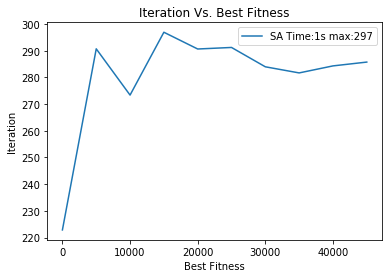

In [323]:
# Set random seed
np.random.seed(2)
NUM_TIMES_TO_RUN=1
#MAX_ITERATION=20000
sum_best_fitness_list=np.array([0,0])
t0 = time.clock()
for i in range(NUM_TIMES_TO_RUN):
    best_fitness_list = []
    for i in range(1, MAX_ITERATION, 5000):
    # Solve problem using the genetic algorithm
        best_state, best_fitness = mlrose.simulated_annealing(problem_fit, max_iters=i)
        #print(i)
        #print(best_state)
        best_fitness_list.append([i, best_fitness])
    #print(best_fitness_list)
    sum_best_fitness_list = sum_best_fitness_list + np.array(best_fitness_list)
#     sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)
avg_best_fitness_SA= sum_best_fitness_list/NUM_TIMES_TO_RUN
time_taken_SA=str(math.ceil((time.clock()-t0)/(NUM_TIMES_TO_RUN)))
maxValueSA= str(math.ceil(max(avg_best_fitness_SA[:,1])))
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
plt.plot(avg_best_fitness_SA[:,0], avg_best_fitness_SA[:,1], label='SA Time:'+time_taken_SA+"s max:"+maxValueSA)
plt.title('Iteration Vs. Best Fitness')
plt.legend()
plt.show()


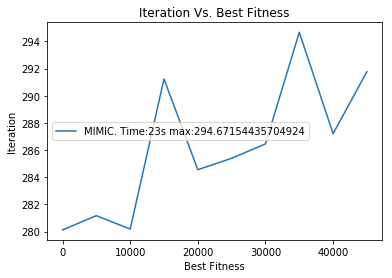

In [324]:
np.random.seed(2)
NUM_TIMES_TO_RUN=1
#MAX_ITERATION=20000
sum_best_fitness_list=np.array([0,0])
t0 = time.clock()
for i in range(NUM_TIMES_TO_RUN):
    best_fitness_list = []
    for i in range(1, MAX_ITERATION, 5000):
    # Solve problem using the genetic algorithm
        best_state, best_fitness = mlrose.mimic(problem_fit, max_attempts = 2, max_iters = i)        #print(i)
        #print(best_state)
        best_fitness_list.append([i, best_fitness])
    #print(best_fitness_list)
    sum_best_fitness_list = sum_best_fitness_list + np.array(best_fitness_list)
#     sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)
avg_best_fitness_MIMIC= sum_best_fitness_list/NUM_TIMES_TO_RUN
time_taken_MIMIC=str(math.ceil((time.clock()-t0)/(NUM_TIMES_TO_RUN)))
maxValueMIMIC= str(max(avg_best_fitness_MIMIC[:,1]))

plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
#plt.plot(avg_best_fitness_GA[:,0], avg_best_fitness_GA[:,1], label='GA. Wall Time:'+time_taken_GA)
#plt.plot(avg_best_fitness_SA[:,0], avg_best_fitness_SA[:,1], label='SA. Wall Time:'+time_taken_SA)
plt.plot(avg_best_fitness_MIMIC[:,0], avg_best_fitness_MIMIC[:,1], label='MIMIC. Time:'+time_taken_MIMIC+"s max:"+maxValueMIMIC)
plt.title('Iteration Vs. Best Fitness')
plt.legend()
plt.show()

# best_state, best_fitness = mlrose.mimic(problem_fit, max_attempts = 50, max_iters = 1 )       #print(i)
# print(best_fitness)


In [325]:
print(best_fitness)

291.77269675862385


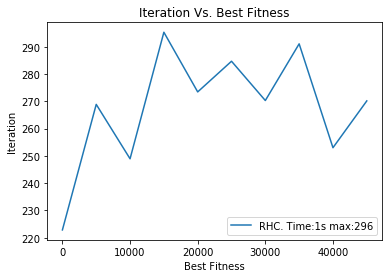

In [326]:
# Set random seed
np.random.seed(2)
NUM_TIMES_TO_RUN=1
#MAX_ITERATION=20000
sum_best_fitness_list=np.array([0,0])
t0 = time.clock()
for i in range(NUM_TIMES_TO_RUN):
    best_fitness_list = []
    for i in range(1, MAX_ITERATION, 5000):
    # Solve problem using the genetic algorithm
        best_state, best_fitness = mlrose.random_hill_climb(problem_fit, max_iters=i)
        #print(i)
        #print(best_state)
        best_fitness_list.append([i, best_fitness])
    #print(best_fitness_list)
    sum_best_fitness_list = sum_best_fitness_list + np.array(best_fitness_list)
#     sum_train_accuracy_list = sum_train_accuracy_list + np.array(train_accuracy_list)
avg_best_fitness_RHC= sum_best_fitness_list/NUM_TIMES_TO_RUN
time_taken_RHC=str(math.ceil((time.clock()-t0)/(NUM_TIMES_TO_RUN)))
maxValueRHC= str(math.ceil(max(avg_best_fitness_RHC[:,1])))
#print(avg_best_fitness_RHC)
plt.xlabel('Best Fitness')
plt.ylabel('Iteration')
#plt.plot(avg_best_fitness_GA[:,0], avg_best_fitness_GA[:,1], label='GA. Wall Time:'+time_taken_GA)
#plt.plot(avg_best_fitness_SA[:,0], avg_best_fitness_SA[:,1], label='SA. Wall Time:'+time_taken_SA)
plt.plot(avg_best_fitness_RHC[:,0], avg_best_fitness_RHC[:,1], label='RHC. Time:'+time_taken_RHC+"s max:"+maxValueRHC)
plt.title('Iteration Vs. Best Fitness')
plt.legend()
plt.show()


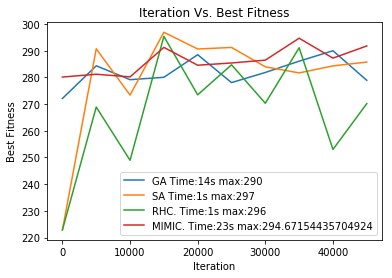

In [327]:
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.plot(avg_best_fitness_GA[:,0], avg_best_fitness_GA[:,1], label='GA Time:'+time_taken_GA+"s max:"+maxValueGA)
plt.plot(avg_best_fitness_SA[:,0], avg_best_fitness_SA[:,1], label='SA Time:'+time_taken_SA+"s max:"+maxValueSA)
plt.plot(avg_best_fitness_RHC[:,0], avg_best_fitness_RHC[:,1], label='RHC. Time:'+time_taken_RHC+"s max:"+maxValueRHC)
plt.plot(avg_best_fitness_MIMIC[:,0], avg_best_fitness_MIMIC[:,1], label='MIMIC. Time:'+time_taken_MIMIC+"s max:"+maxValueMIMIC)
plt.title('Iteration Vs. Best Fitness')
plt.legend()
plt.show()